In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect(':memory:')

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [3]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.to_sql('boston', con, index=False, if_exists='replace')

506

In [6]:
pd.read_sql(
    '''
    SELECT * FROM boston
    limit 5
    ''',
    con,
)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
tasks = 0

### Все задания нужно выполнить только с помощью sql

1. Выведите количество пустых значений по колонкам CRIM, ZN, INDUS, CHAS, NOX (название колонки, кол-во пустых значений)

In [33]:
tasks+=1
pd.read_sql(
    '''
    SELECT 'CRIM' as column, count(*) FROM boston where cast(CRIM as float) = 0.0
    union 
    SELECT 'ZN' as column, count(*) FROM boston where cast(ZN as float) = 0.0
    union
    SELECT 'INDUS' as column, count(*) FROM boston where cast(INDUS as float) = 0.0
    union
    SELECT 'CHAS' as column, count(*) FROM boston where cast(CHAS as float) = 0.0
    union
    SELECT 'NOX' as column, count(*) FROM boston where cast(NOX as float) = 0.0
    
    ''',
    con,
)

,column,count(*)
0,CHAS,471
1,CRIM,0
2,INDUS,0
3,NOX,0
4,ZN,372


2. Выведите количество уникальных значений по колонокам CRIM, ZN, INDUS, CHAS, NOX (название колонки, кол-во уникальных значений)

In [104]:
tasks+=1
pd.read_sql(
    '''
    SELECT 'CRIM' as column, COUNT(DISTINCT CRIM) FROM boston UNION 
    SELECT 'ZN' as column, COUNT(DISTINCT ZN) FROM boston UNION 
    SELECT 'INDUS' as column, COUNT(DISTINCT INDUS) FROM boston UNION 
    SELECT 'CHAS' as column, COUNT(DISTINCT CHAS) FROM boston UNION 
    SELECT 'NOX' as column, COUNT(DISTINCT NOX) FROM boston  
    ''',
    con,
)

,column,COUNT(DISTINCT CRIM)
0,CHAS,2
1,CRIM,504
2,INDUS,76
3,NOX,81
4,ZN,26


3. Выведите колонки, у которых медиана равна минимальному значению (название колонки) выбирая из CRIM, ZN, INDUS, CHAS, NOX.
Напишите какой вывод можно сделать по данным в этих колонках

In [161]:
tasks+=1
pd.read_sql(
    '''
    select * from (
    with t as (select count(*)/2 as middle from boston)
    select * from ( 
        select 'crim' as column, crim as median, min(crim) over() as min, row_number() over(order by crim) as crim_num  from boston 
    ) where crim_num = (select middle from t)
    union 
    select * from ( 
        select 'zn' as column, zn as median, min(zn) over() as min, row_number() over(order by zn) as zn_num  from boston 
    ) where zn_num = (select middle from t)
    union 
    select * from ( 
        select 'INDUS' as column, INDUS as median, min(INDUS) over() as min, row_number() over(order by INDUS) as INDUS_num  from boston 
    ) where INDUS_num = (select middle from t)
    union 
    select * from ( 
        select 'CHAS' as column, CHAS as median, min(CHAS) over() as min, row_number() over(order by CHAS) as CHAS_num  from boston 
    ) where CHAS_num = (select middle from t)
    union 
    select * from ( 
        select 'NOX' as column, NOX as median, min(NOX) over() as min, row_number() over(order by NOX) as NOX_num  from boston 
    ) where NOX_num = (select middle from t)
     ) where median = min
    
    ''',
    con,
)

,column,median,min,crim_num
0,CHAS,0.0,0.0,253
1,zn,0.0,0.0,253


## вывод однозначный: 
### при отсутствии median() в sqlite3, думается, что каждой задаче свой инструмент

4. Выведите разницу между среднем количеством комнат(RM) в домах с самой дорогой стоимостью(MEDV) и 25 самыми дешевыми домами. 
Аналогично по 50, 100, 200, 300 самыми дешевыми домами. (кол-во домов(25,50,100,200,300), среднее кол-во комнат в них, среднее кол-во комнат в самых дорогих, разница).
Напишите влияет ли кол-во комнат на стоимость и как сильно.

In [232]:
for N in ['25', '50', '100', '200', '300']:
    print(f'для {N} разница:', pd.read_sql(
        f''' 
        select avr_rm_max - avg_rm as 'разница' from (
        select *, lead(avg_rm) over() as avr_rm_max from (
        select 'дешевые' as rooms, avg(rm) as avg_rm from (select medv, rm from boston order by medv limit {N} )
        union  all
        select 'дорогие' as rooms, avg(rm) as avg_rm from (select medv, rm from boston where medv = (select max(medv) from boston))
        ) limit 1 
        )
        ''',
        con,
    ).iloc[0][0])

для 25 разница: 1.736159999999999
для 50 разница: 1.73076
для 100 разница: 1.5968800000000023
для 200 разница: 1.572295000000003
для 300 разница: 1.5117733333333367


#### я бы написал процедуру с циклом , если бы это был не sqlite3!!! 

In [ ]:
pd.read_sql(
        f''' 
        select avr_rm_max - avg_rm as 'разница' from (
        select *, lead(avg_rm) over() as avr_rm_max from (
        select 'дешевые' as rooms, avg(rm) as avg_rm from (select medv, rm from boston order by medv limit {N} )
        union  all
        select 'дорогие' as rooms, avg(rm) as avg_rm from (select medv, rm from boston where medv = (select max(medv) from boston))
        ) limit 1 
        )
        ''',
        con,
    )

5. Выведите ранги значений колонки LSTAT(процент населения с более низким статусом) в домах с самой дорогой стоимостью (значение LSTAT, стоимость, ранг) среди всех значений LSTAT. Напишите какой вывод можно сделать по этим данным.

In [246]:
tasks+=1
pd.read_sql(
    '''
    SELECT LSTAT, rank FROM (
        select *, rank() over(order by medv) as rank from boston order by rank
    ) where medv = (select max(medv) from boston) 
    ''',
    con,
)

,LSTAT,rank
0,1.73,491
1,1.92,491
2,3.32,491
3,3.70,491
4,4.45,491
5,2.97,491
6,2.88,491
7,4.63,491
8,5.12,491
9,7.44,491


### вывод: в домах с высокой стоимостью LSTAT ниже (неверный вывод)

6. Выведите среднюю стоимость домов граничащих с рекой(CHAS) и нет (граничит/не граничит, стоимость)

In [254]:
tasks+=1
pd.read_sql(
    '''
    SELECT case when chas = 1 then 'граничит' else 'не граничит' end as 'граничит с рекой', avg(MEDV)
    FROM boston 
    group by chas
    ''',
    con,
)

,граничит с рекой,avg(MEDV)
0,не граничит,22.093843
1,граничит,28.440000


In [ ]:
tasks+=1
pd.read_sql(
    '''
    SELECT * FROM boston
    limit 5
    ''',
    con,
)

7. Выведите все колонки, у которых среднее значение выше, когда дом граничит с рекой (название колонки) выбирая из CRIM, ZN, INDUS, CHAS, NOX. Напишите какой вывод можно сделать по этим данным.

In [269]:
tasks+=1
pd.read_sql(
    '''
    SELECT column, sum(s) as more FROM ( 
        SELECT 'CRIM' as column
           , case when chas =1 then avg(CRIM) else -avg(CRIM) end as s
        FROM boston 
        group by chas
        UNION 
        SELECT 'ZN' as column
           , case when chas =1 then avg(ZN) else -avg(ZN) end as s
        FROM boston 
        group by chas
        UNION 
        SELECT 'INDUS' as column
           , case when chas =1 then avg(INDUS) else -avg(INDUS) end as s
        FROM boston 
        group by chas
        UNION 
        SELECT 'CHAS' as column
           , case when chas =1 then avg(CHAS) else -avg(CHAS) end as s
        FROM boston 
        group by chas
        UNION 
        SELECT 'NOX' as column
           , case when chas =1 then avg(NOX) else -avg(NOX) end as s
        FROM boston 
        group by chas
    ) group by column
    having more > 0
    ''',
    con,
)

,column,more
0,CHAS,1.000000
1,INDUS,1.699950
2,NOX,0.041609


8. Выведите значения долей промышленной застройки(INDUS), концентрации оксидов азота(NOX) и по их перцентилям - 10, 20 ... 100 ( перцетиль(10,20...100),значение INDUS, значение NOX). Напишите прослеживается между ними взаимосвязь

In [341]:
tasks+=1
df = pd.read_sql(
    '''
    with percentiles as (SELECT 
        INDUS
        , NOX
        , PERCENT_RANK () OVER(ORDER BY INDUS) AS P_INDUS
        , PERCENT_RANK () OVER(ORDER BY NOX) AS P_NOX 
    FROM boston )
    -- может коряво, но работает 
    
    select * from ( 
    select * from (select '.1' as percentile, INDUS from percentiles where P_INDUS >= 0.1 order by p_indus limit 1) union
    select * from (select '.2' as percentile, INDUS from percentiles where P_INDUS >= 0.2 order by p_indus limit 1)  union
    select * from (select '.3' as percentile, INDUS from percentiles where P_INDUS >= 0.3 order by p_indus limit 1)  union
    select * from (select '.4' as percentile, INDUS from percentiles where P_INDUS >= 0.4 order by p_indus limit 1)  union
    select * from (select '.5' as percentile, INDUS from percentiles where P_INDUS >= 0.5 order by p_indus limit 1)  union
    select * from (select '.6' as percentile, INDUS from percentiles where P_INDUS >= 0.6 order by p_indus limit 1)  union
    select * from (select '.7' as percentile, INDUS from percentiles where P_INDUS >= 0.7 order by p_indus limit 1)  union
    select * from (select '.8' as percentile, INDUS from percentiles where P_INDUS >= 0.8 order by p_indus limit 1)  union
    select * from (select '.9' as percentile, INDUS from percentiles where P_INDUS >= 0.9 order by p_indus limit 1) union
    select * from (select '1' as percentile, max(INDUS) from percentiles ) 
    ) t1  join (
    select * from (select '.1' as percentile, NOX from percentiles where P_NOX >= 0.1 order by P_NOX limit 1) union
    select * from (select '.2' as percentile, NOX from percentiles where P_NOX >= 0.2 order by P_NOX limit 1)  union
    select * from (select '.3' as percentile, NOX from percentiles where P_NOX >= 0.3 order by P_NOX limit 1)  union
    select * from (select '.4' as percentile, NOX from percentiles where P_NOX >= 0.4 order by P_NOX limit 1)  union
    select * from (select '.5' as percentile, NOX from percentiles where P_NOX >= 0.5 order by P_NOX limit 1)  union
    select * from (select '.6' as percentile, NOX from percentiles where P_NOX >= 0.6 order by P_NOX limit 1)  union
    select * from (select '.7' as percentile, NOX from percentiles where P_NOX >= 0.7 order by P_NOX limit 1)  union
    select * from (select '.8' as percentile, NOX from percentiles where P_NOX >= 0.8 order by P_NOX limit 1)  union
    select * from (select '.9' as percentile, NOX from percentiles where P_NOX >= 0.9 order by P_NOX limit 1) union
    select * from (select '1' as percentile, max(NOX) from percentiles ) 
    ) t2 using(percentile)
    ''',
    con,
)
df

,percentile,INDUS,NOX
0,.1,2.93,0.4280
1,.2,4.39,0.4429
2,.3,6.06,0.4840
3,.4,7.38,0.5100
4,.5,9.90,0.5440
5,.6,13.89,0.5800
6,.7,19.58,0.6090
7,.8,19.58,0.6710
8,.9,21.89,0.7180
9,1,27.74,0.8710


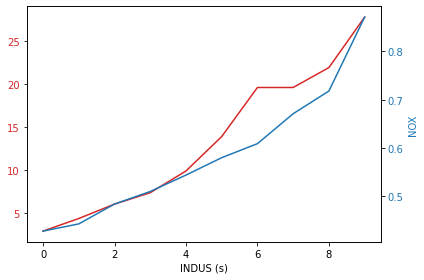

In [347]:
import matplotlib.pyplot as plt
import numpy as np

# Create some mock data
t = df.index
data1 = df.INDUS
data2 = df.NOX

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('INDUS (s)')
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('NOX', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### вывод: кореляция налицо, надо жить левее, не правее

In [349]:
tasks = 8

In [348]:
if tasks==8:
    print('Выполнены все задания 🙂')
else:
    print('Выполнены не все задания! 🙀')

Выполнены не все задания! 🙀
